<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [148]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# Start coding!

## Getting Started
After loading the data into a dataframe and viewing it to get a better idea of what I'm working with, I looked at the info to see what dtypes each column contained and if there were any missing values. The 'credit_score', and 'annual_mileage' columns had missing values, so I plotted histograms for each column and calculated the percentage of total data that was missing. As the values in both columns appeared to be normally distributed and the missing values made up less than 10% of the total data, I decided to replace the missing values with the mean value in each column.
Upon viewing the data, it appears that multiple columns have the values listed as category names instead of their respective integers as described in the intro above. To fix this, I went through each column that needed changing and changed each value to its respective integer. 

In [149]:
car_insurance = pd.read_csv('car_insurance.csv')
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [150]:
print(car_insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

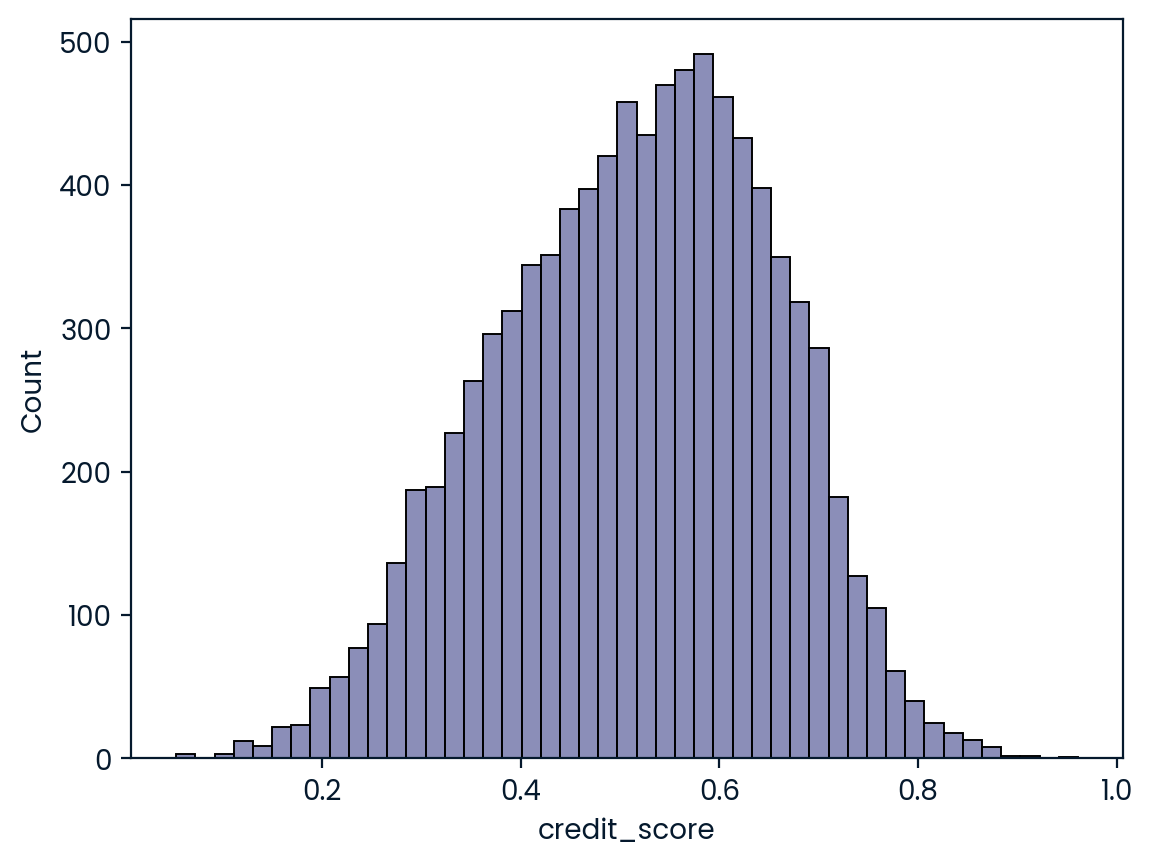

0.0982


In [151]:
#Exploring 'credit_score' column values
sns.histplot(x='credit_score', data=car_insurance)
plt.show()
print(car_insurance['credit_score'].isna().sum()/len(car_insurance['credit_score']))

In [152]:
#Replacing NA values in 'credit_score' column with the column's mean
car_insurance['credit_score'].fillna(car_insurance['credit_score'].mean(), inplace=True )

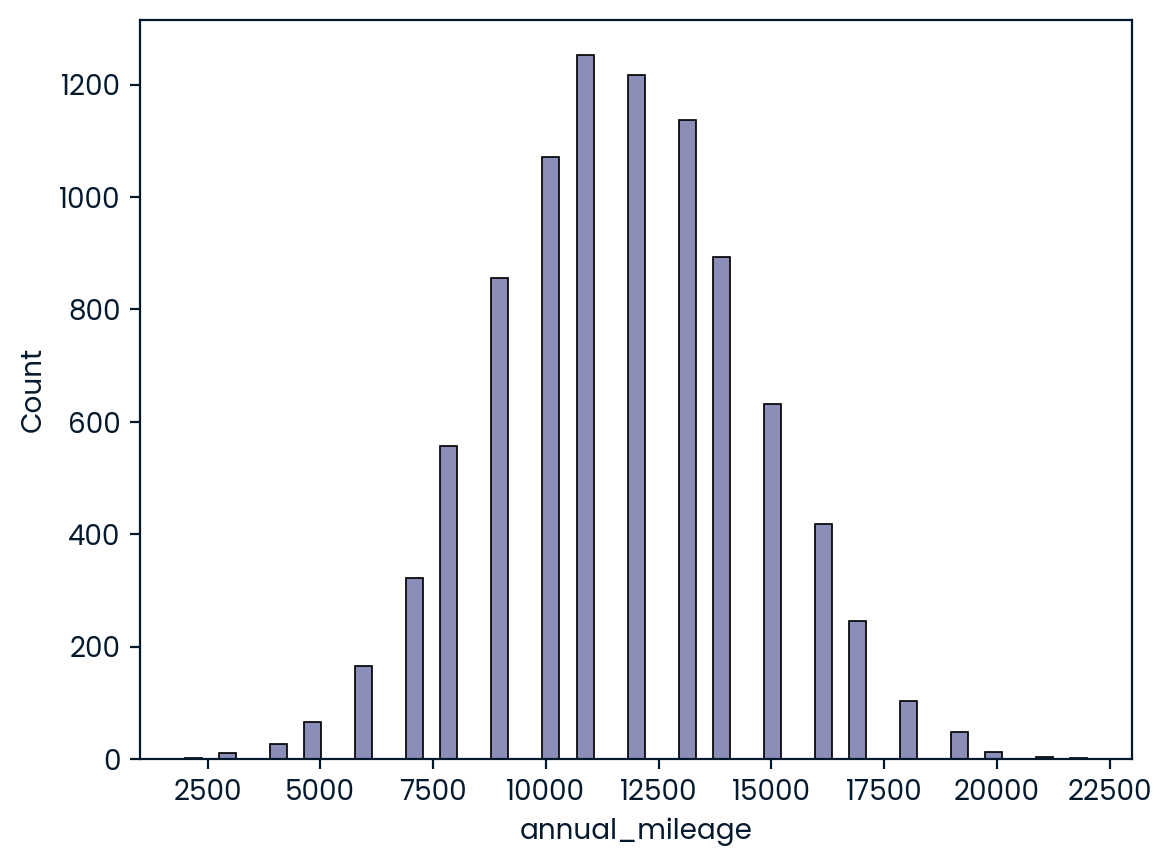

0.0957


In [153]:
#Exploring 'annual_mileage' column values
sns.histplot(x='annual_mileage', data=car_insurance)
plt.show()
print(car_insurance['annual_mileage'].isna().sum()/len(car_insurance['credit_score']))

In [154]:
#Replacing NA values in 'annual_mileage' column with the column's mean
car_insurance['annual_mileage'].fillna(car_insurance['annual_mileage'].mean(), inplace =True)

In [155]:
#Confirming all missing values in the two columns were filled in
print(car_insurance[['credit_score', 'annual_mileage']].isna().sum())

credit_score      0
annual_mileage    0
dtype: int64


In [156]:
#Assigning values in 'driving_experience' with their respective number
drive_exp_unique = car_insurance['driving_experience'].unique()
print(drive_exp_unique)
car_insurance['driving_experience'].replace(drive_exp_unique, [0, 1, 2, 3], inplace=True)
print(car_insurance['driving_experience'].unique())

['0-9y' '10-19y' '20-29y' '30y+']
[0 1 2 3]


In [157]:
education_unique = car_insurance['education'].unique()
print(education_unique)
car_insurance['education'].replace(education_unique, [1, 0, 2], inplace=True)

['high school' 'none' 'university']


In [158]:
income_unique = car_insurance['income'].unique()
print(income_unique)
car_insurance['income'].replace(income_unique, [3, 0, 1, 2], inplace=True)

['upper class' 'poverty' 'working class' 'middle class']


In [159]:
vehicle_year_unique = car_insurance['vehicle_year'].unique()
print(vehicle_year_unique)
car_insurance['vehicle_year'].replace(vehicle_year_unique, [1, 0], inplace = True)

['after 2015' 'before 2015']


In [160]:
vehicle_type_unique = car_insurance['vehicle_type'].unique()
print(vehicle_type_unique)
car_insurance['vehicle_type'].replace(vehicle_type_unique, [0, 1], inplace = True)

['sedan' 'sports car']


In [161]:
#Checking that all values have been updated correctly
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0


## Objective 1: Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the "outcome" column), excluding the "id" column.
Since I wanted to run logistic regression models with all of the columns escept the 'id' column, I created a DataFrame that did not contain the 'id' column. I then created a `for` loop that would calculate the accuracy of each logistic regression model using the feature in each column as the predictor for whether or not a customer would submit a claim. In the `for`loop, I created a logistic regression model and a confusion matrix, and then calculated the accuracy using the different values in the confusion matrix. For organization purposes, I appended each feature and its accuracy to the lists `col_list` and `accuracy_list` that I had created before the `for` loop. I then combined the two lists into one DataFrame and sorted them by accuracy to find the feature that was most accurate in predicting if a customer would submit a claim. The feature that was most accurate in predicting if a customer would submit a claim or not was the customer's driving experience, with accuracy of 0.7771. 


In [162]:
#Create a dataframe that doesn't contain the 'id' column
car_insurance_no_id = car_insurance.drop(columns='id')
print(car_insurance_no_id.columns)

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')


In [163]:
#Creating empty lists that I will append data to in the for loop below
col_list = []
accuracy_list = []
#For loop to calculate accuracy for the logistic regression models generated from each feature
for col in car_insurance_no_id.columns:
    logit_model = logit(f'outcome ~ {col}', data=car_insurance_no_id).fit()
    confusion_matrix = logit_model.pred_table()
    #Assigning true and false negatives, and true and false positives from the confusion matrix to variables
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]
    #Calculating accuracy using the true/false negatives and positives
    acc = (TN + TP)/ (TN + FP + FN + TP)
    #Appending each feature and its accuracy to the lists created above
    col_list.append(col)
    accuracy_list.append(acc)
print(col_list)
print(accuracy_list)
    

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.603848
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [164]:
#Combining the lists into a DataFrame
pred_accuracy = pd.DataFrame({'Predictor': col_list,
                             'Accuracy': accuracy_list})
#Sorting DataFrame by accuracy, reseting the index and then dropping the 'outcome' predictor since the outcome cannot be its own predictor
pred_accuracy.sort_values(by='Accuracy', inplace=True, ascending=False)
pred_accuracy.reset_index(inplace=True, drop=True)
pred_accuracy.drop(0, inplace=True)
print(pred_accuracy)
 

              Predictor  Accuracy
1    driving_experience    0.7771
2                   age    0.7747
3                income    0.7425
4     vehicle_ownership    0.7351
5          credit_score    0.7054
6        annual_mileage    0.6904
7             education    0.6867
8          vehicle_year    0.6867
9                gender    0.6867
10             children    0.6867
11          postal_code    0.6867
12         vehicle_type    0.6867
13  speeding_violations    0.6867
14                 duis    0.6867
15       past_accidents    0.6867
16              married    0.6867


In [167]:
#Creating a DataFrame containing only data for most accurate predictor
best_feature_df = pd.DataFrame({'best_feature': [pred_accuracy.iloc[0, 0]],
                                'best_accuracy': [pred_accuracy.iloc[0, 1]]})
print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771
